# Exercise 5 - BLOB Analysis (connected component analysis and object classification)

## Blob analysis in Python

In [1]:
# Import relevant packages
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation, measure
from skimage.color import label2rgb

In [2]:
# helper function
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified, cmap = "gray")
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

### Lego classification

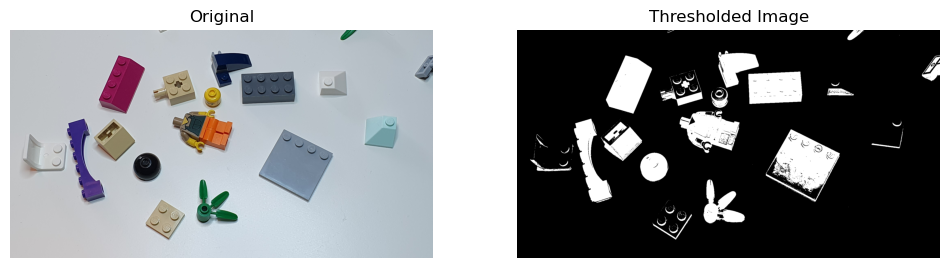

In [3]:
# Exercise 1
im_org = io.imread("data_ex5/lego_4_small.png")
im_gray = color.rgb2gray(im_org)
thres = threshold_otsu(im_gray)
im_bin = img_as_ubyte(im_gray < thres)

show_comparison(im_org, im_bin, "Thresholded Image")

In [4]:
# Exercise 2
im_clear_border = segmentation.clear_border(im_bin)

In [5]:
# Exercise 3
se = morphology.disk(5)
im_open = morphology.closing(im_clear_border, se)
im_close = morphology.opening(im_open, se)

In [6]:
# Exercise 4
label_img = measure.label(im_close)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 29


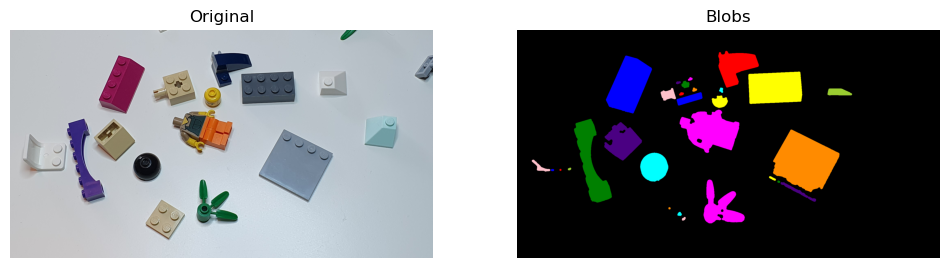

In [7]:
# Exercise 5
im_label = label2rgb(label_img)
show_comparison(im_org, im_label, "Blobs")

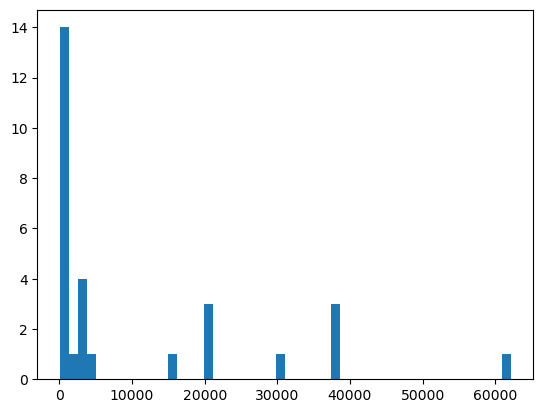

In [8]:
# Exercise 6
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()

In [2]:
# Exercise 7
!python Ex5-BlobAnalysisInteractive.py 

### Cell counting 

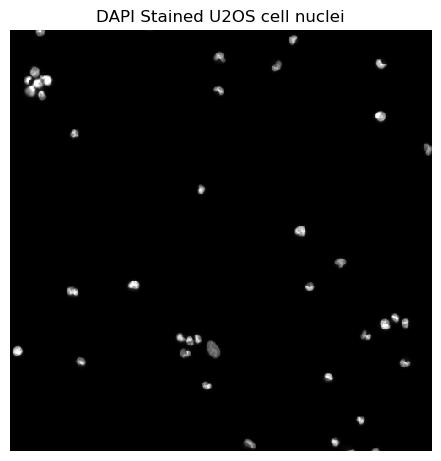

In [12]:
in_dir = "data_ex5/"
img_org = io.imread(in_dir + 'Sample E2 - U2OS DAPI channel.tiff')
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small) 
io.imshow(img_gray, vmin=0, vmax=100)
plt.title('DAPI Stained U2OS cell nuclei')
plt.axis('off')
io.show()

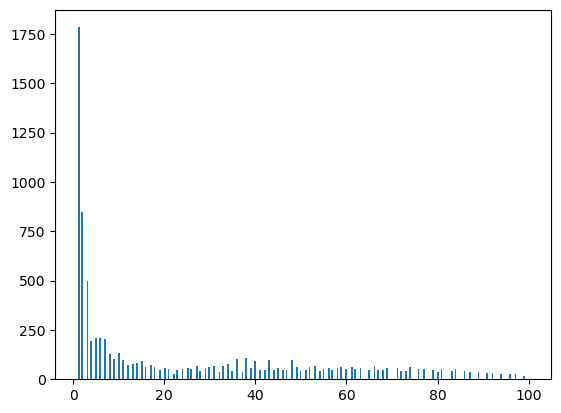

In [13]:
# Exercise 8 
plt.hist(img_gray.ravel(), bins=256, range=(1, 100))
io.show()

thres = threshold_otsu(img_gray)
img_bin = img_as_ubyte(img_gray > thres)

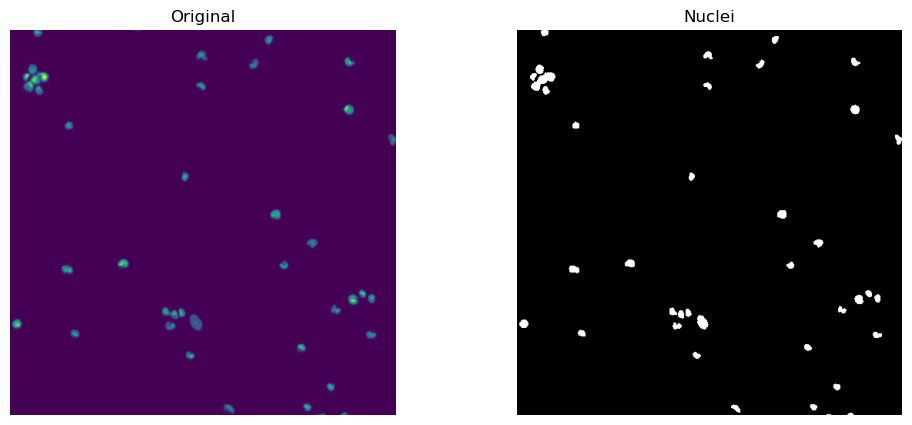

In [14]:
show_comparison(img_gray, img_bin, "Nuclei")

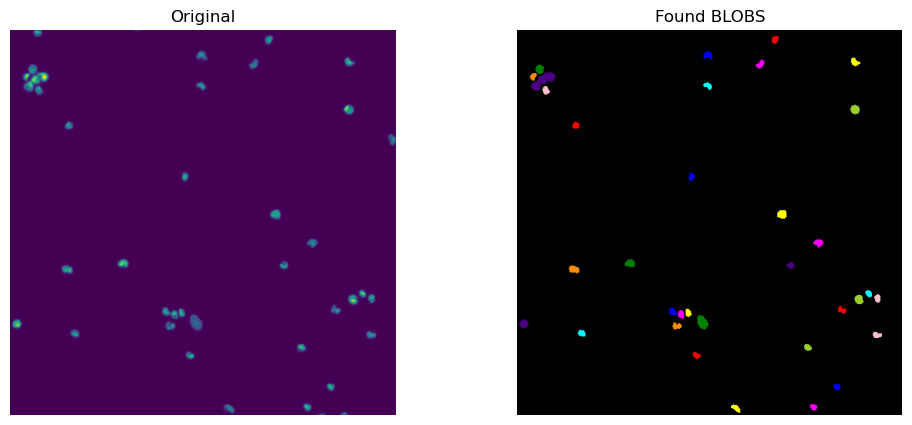

In [15]:
# Exercise 9 
img_clear_border = segmentation.clear_border(img_bin)
label_img = measure.label(img_clear_border)
image_label_overlay = label2rgb(label_img)
show_comparison(img_gray, image_label_overlay, 'Found BLOBS')

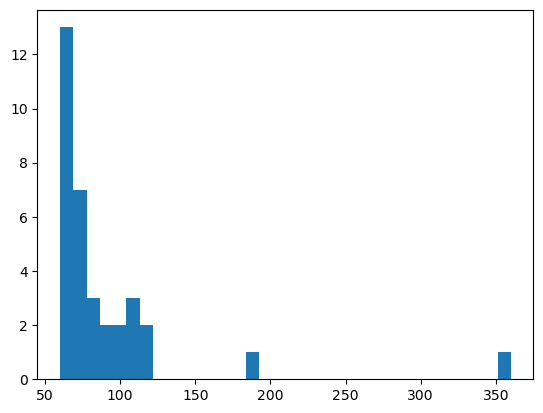

In [16]:
# Exercise 10 
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])

plt.hist(areas, bins = len(areas))
plt.show()

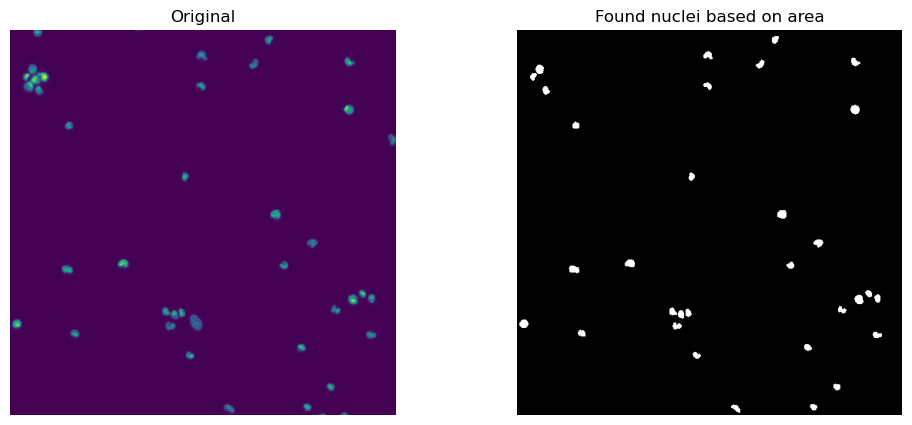

In [17]:
# Exercise 11
min_area = 10
max_area = 130 

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
	# Find the areas that do not fit our criteria
	if region.area > max_area or region.area < min_area:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
show_comparison(img_small, i_area, 'Found nuclei based on area')

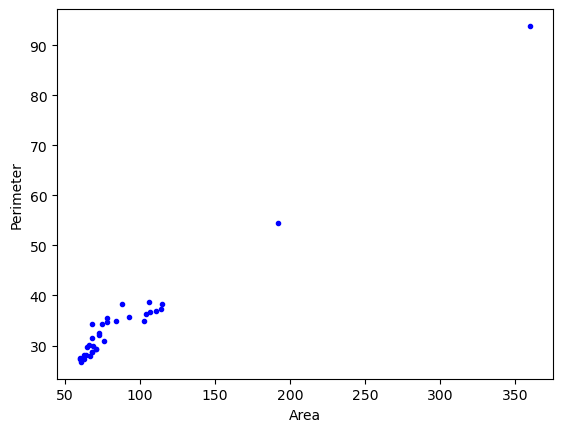

In [18]:
# Exerscise 12
perimeters = np.array([prop.perimeter for prop in region_props])

plt.plot(areas, perimeters, '.b')
plt.xlabel("Area")
plt.ylabel('Perimeter')
plt.show()


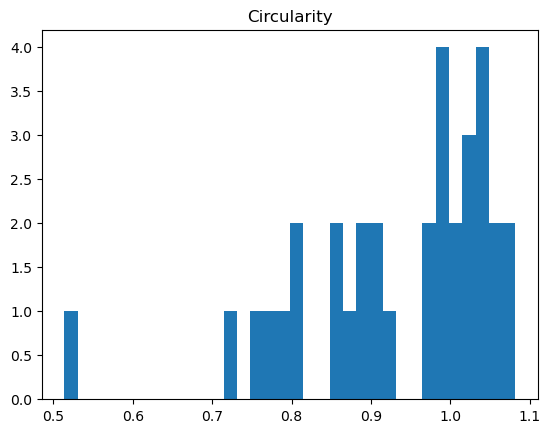

In [19]:
# Exercise 13
circ = 4 * math.pi * areas /(perimeters**2)
plt.hist(circ, bins = len(circ))
plt.title("Circularity")
plt.show()


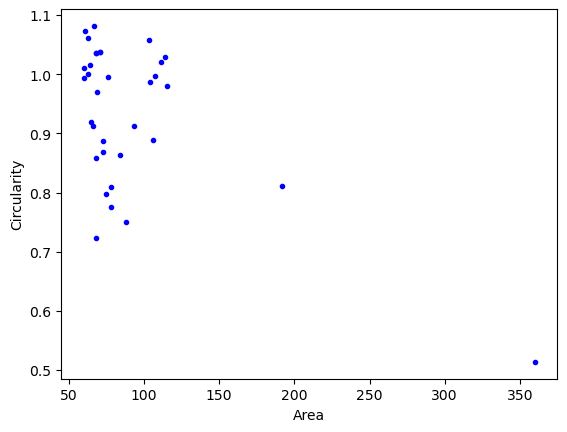

In [20]:
# Exercise 14 
plt.plot(areas, circ, '.b')
plt.xlabel("Area")
plt.ylabel("Circularity")
plt.show()

Objects:  28


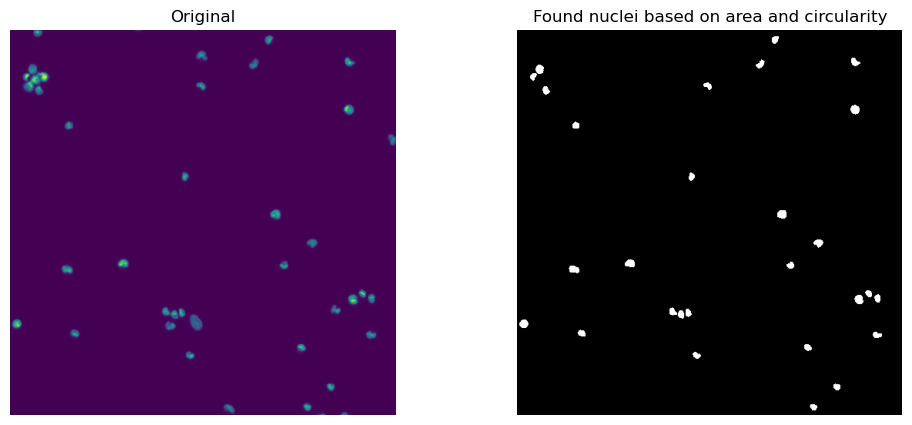

In [21]:
min_area = 10
max_area = 150
label_img_filter = label_img
num_objects = 0
for region in region_props:
    p = region.perimeter
    a = region.area
    circularity = 4 * math.pi * a / (p * p)
    if circularity < 0.8 or a < min_area or a > max_area:
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
    else:
        num_objects += 1

print("Objects: ", num_objects)
i_circ = label_img_filter > 0
show_comparison(img_small, i_circ, 'Found nuclei based on area and circularity')

Objects:  91


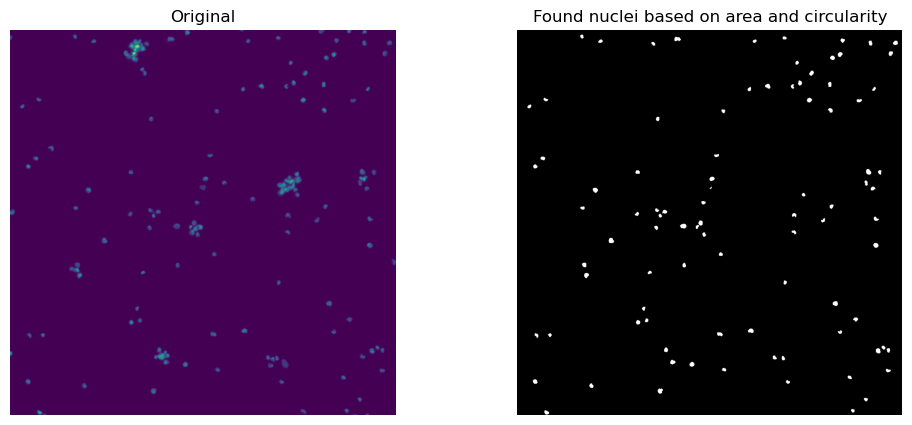

In [25]:
# Exercise 15
img_slice = img_org[300:1200, 500:1400]
im_gray = img_as_ubyte(img_slice)
thres = threshold_otsu(im_gray)
img_bin = img_as_ubyte(im_gray > thres)
img_clear_border = segmentation.clear_border(img_bin)
label_img = measure.label(img_clear_border)
region_props = measure.regionprops(label_img)

min_area = 10
max_area = 150
label_img_filter = label_img
num_objects = 0
for region in region_props:
    p = region.perimeter
    a = region.area
    circularity = 4 * math.pi * a / (p * p)
    if circularity < 0.8 or a < min_area or a > max_area:
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
    else:
        num_objects += 1

print("Objects: ", num_objects)
i_circ = label_img_filter > 0
show_comparison(img_slice, i_circ, 'Found nuclei based on area and circularity')

C:\Users\There\AppData\Local\Temp\ipykernel_10152\579951757.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  circularity = 4 * math.pi * a / (p * p)


Objects:  312


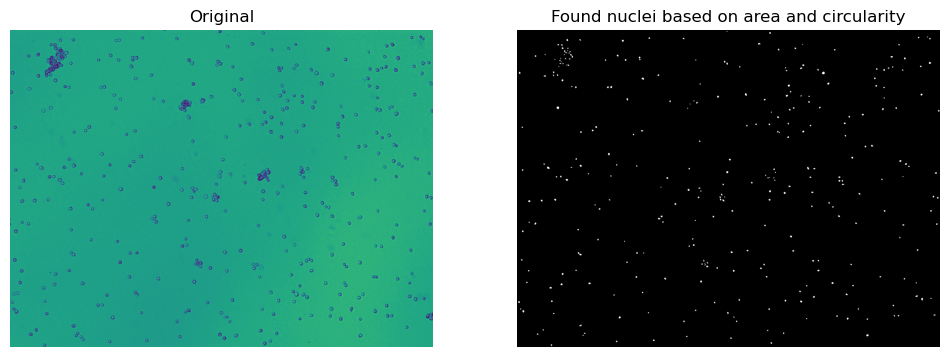

In [30]:
# Exercise 16 
im = io.imread("data_ex5/Sample E2 - U2OS AP channel.tiff")
im_gray = img_as_ubyte(im)
thres = threshold_otsu(im_gray)
img_bin = img_as_ubyte(im_gray > thres)
img_clear_border = segmentation.clear_border(img_bin)
label_img = measure.label(img_clear_border)
region_props = measure.regionprops(label_img)

min_area = 10
max_area = 150
label_img_filter = label_img
num_objects = 0
for region in region_props:
    p = region.perimeter
    a = region.area
    circularity = 4 * math.pi * a / (p * p)
    if circularity < 0.8 or a < min_area or a > max_area:
        for cords in region.coords:
            label_img_filter[cords[0], cords[1]] = 0
    else:
        num_objects += 1

print("Objects: ", num_objects)
i_circ = label_img_filter > 0
show_comparison(im, i_circ, 'Found nuclei based on area and circularity')